Author: Tommy James

Description: CS4490 Data Mining - Group Assignment #2 

### 4. Attribute Analysis and Visualization

Your data set should contain a number of different attributes. Pick the most relevant
ones (at least 3, with at least one numerical and one categorical; do not use IDs), and
for each of them:

* Describe the range of valid values (in the sample, and - if appropriate - in the population), and their distribution (summary statistics) in an appropriate form
* Visualize the attribute values in an appropriate form
* Note anything interesting, unusual and/or unexpected that you notice about the data

Where appropriate, you can visualize multiple attributes in a single graph. You can also
provide the summary statistics in a table, if that makes it more readable.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cancer_data.csv')
df.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
0,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Chemotherapy
1,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Immunotherapy (Including Vaccines)
2,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Surgery, NOS"
3,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Targeted Molecular Therapy
4,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   vital_status                 14552 non-null  object
 9   treatment_type               14552 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


### Age

In [4]:
df['age_at_diagnosis'].head()

0    24213
1    24213
2    24213
3    24213
4    24213
Name: age_at_diagnosis, dtype: int64

note: age_at_diagnosis is the age in days of the individual at the time of diagnosis, so we have to divide by 365 to get an estimate of the age in years

In [5]:
df['age_at_diagnosis'][0] / 365

66.33698630136986

In [10]:
# convert the entire column of 'age_at_diagnosis' from days to years
df2 = pd.DataFrame
df2 = df2.copy(df)
df2['age_at_diagnosis'] = df2['age_at_diagnosis'] / 365
df2['age_at_diagnosis'] = df2['age_at_diagnosis'].astype(int)
df2.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
0,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Chemotherapy
1,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Immunotherapy (Including Vaccines)
2,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Surgery, NOS"
3,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Targeted Molecular Therapy
4,HCMI.HCM-BROD-0002-C71,white,male,66,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"


In [11]:
# summary statistics
df2['age_at_diagnosis'].describe()

count    14552.000000
mean        56.637576
std         14.178619
min          2.000000
25%         47.000000
50%         57.000000
75%         67.000000
max         90.000000
Name: age_at_diagnosis, dtype: float64

Text(0.5, 1.0, 'Distribution of Age at Diagnosis')

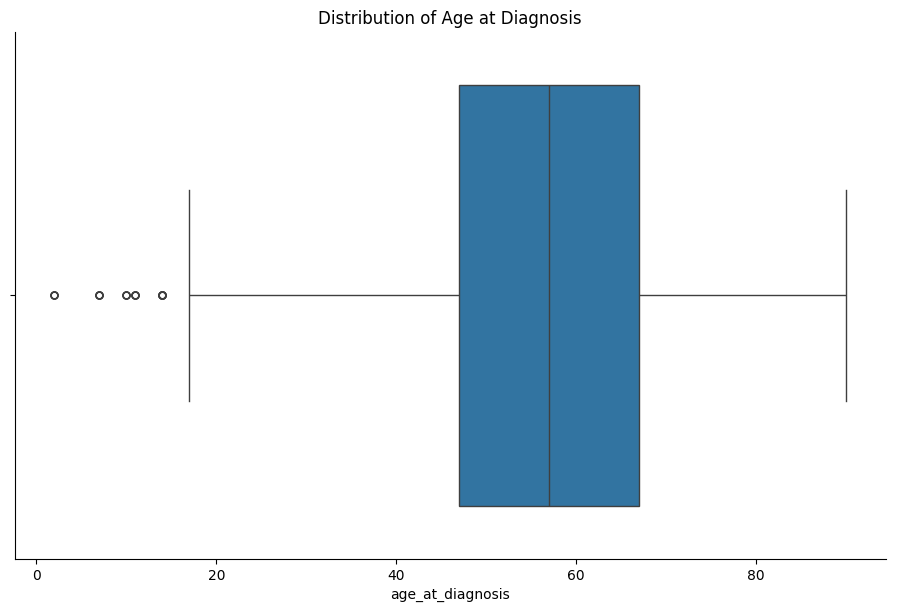

In [20]:
sns.catplot(data=df2, x='age_at_diagnosis', kind='box', height=6, aspect=1.5)
plt.title('Distribution of Age at Diagnosis')

Note: there are outliers at younger ages below approxiamtely 18 years old

Text(0.5, 1.0, 'Average Age per Sex\n(for each Diagnosis Site)')

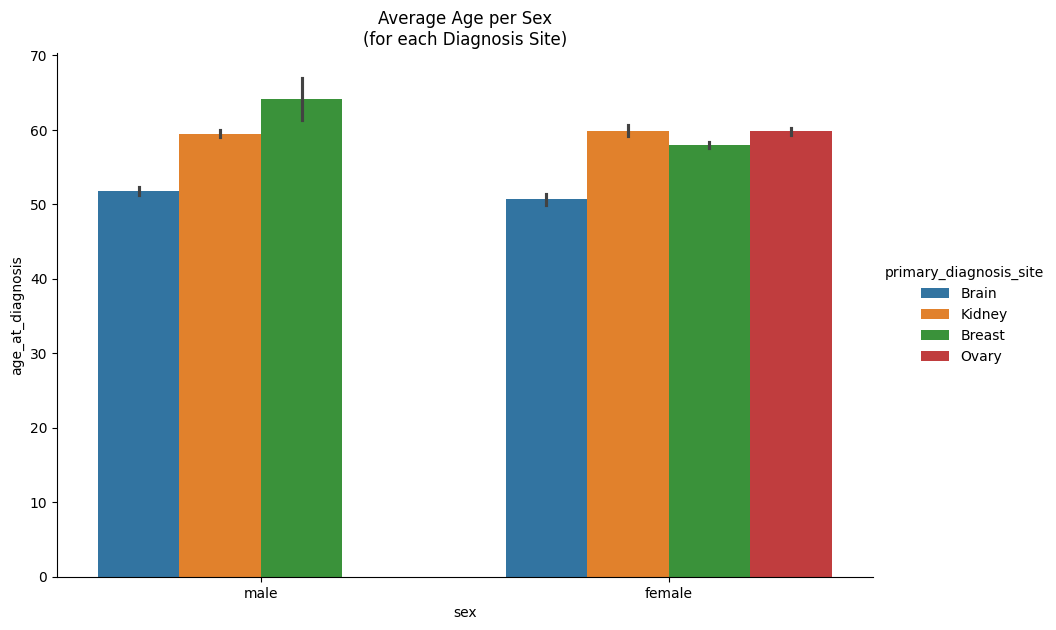

In [148]:
sns.catplot(data=df2, x='sex', y='age_at_diagnosis', kind='bar', hue='primary_diagnosis_site', height=6, aspect=1.5)
plt.title('Average Age per Sex\n(for each Diagnosis Site)')

Notes:
* Males and Females with Brain cancer are diagnosed at a younger age on average compared to others
* Average age for most diagnosis are in the 50s

### Primary Diagnosis Site

In [21]:
df2['primary_diagnosis_site'].value_counts()

primary_diagnosis_site
Brain     4526
Breast    4163
Kidney    3669
Ovary     2194
Name: count, dtype: int64

Text(0.5, 1.0, 'Primary Diagnosis Site')

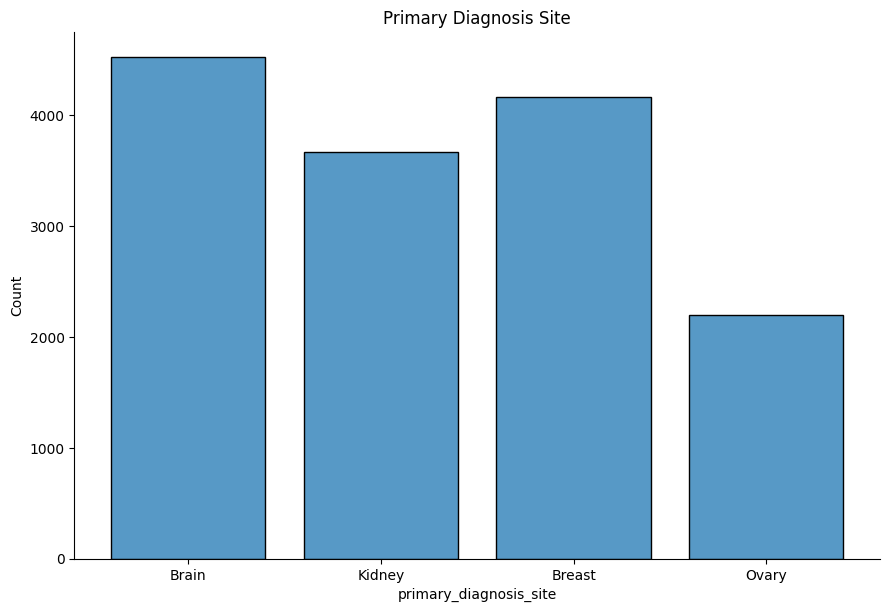

In [135]:
sns.displot(data=df2, x='primary_diagnosis_site', height=6, aspect=1.5, shrink=0.8)
plt.title('Primary Diagnosis Site')

Text(0.5, 1.0, 'Primary Diagnosis Site per Sex')

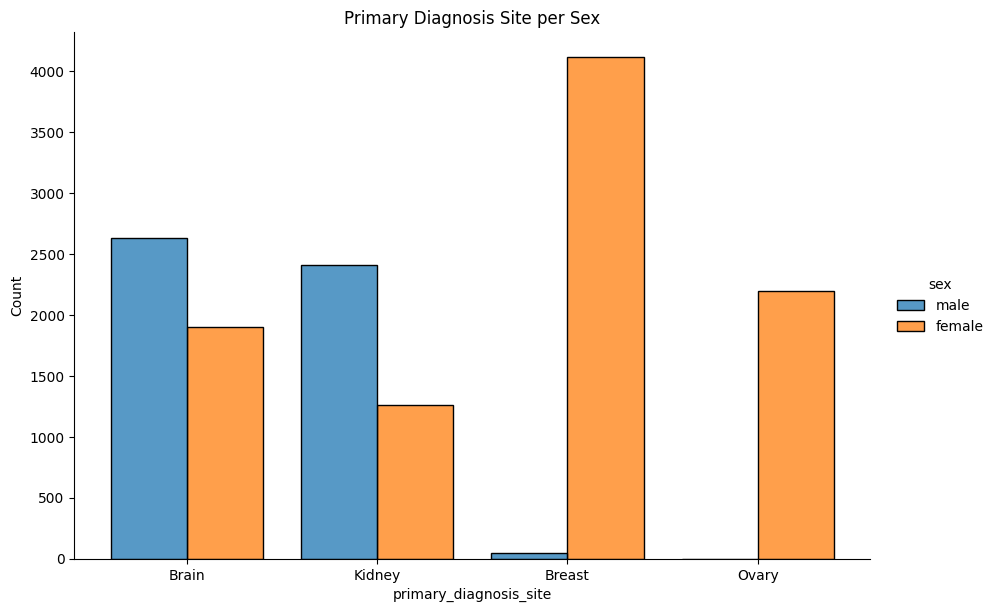

In [134]:
# visualize the distribution of primary diagnosis site for each sex
sns.displot(data=df2, x='primary_diagnosis_site', hue='sex', multiple='dodge', height=6, aspect=1.5, shrink=0.8)
plt.title('Primary Diagnosis Site per Sex')

* More males have Brain or Kidney cancer. Of course, only females have Ovary cancer, but some males also have Breast cancer.

In [55]:
male_breast_cancer = df2.loc[(df2['primary_diagnosis_site'] == 'Breast') & (df['sex'] == 'male')]
len(male_breast_cancer)

48

* There are 48 males with Breast cancer

Text(0.5, 1.0, 'Primary Diagnosis Site per Vital Status')

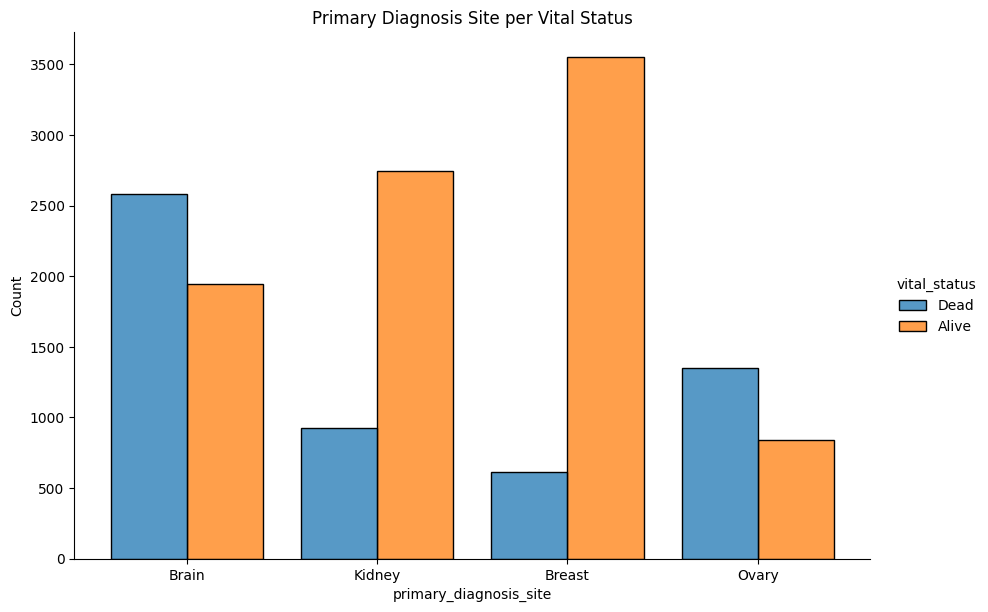

In [133]:
# visualize the distribution of primary diagnosis site for each vital status
sns.displot(data=df2, x='primary_diagnosis_site', hue='vital_status', multiple='dodge', height=6, aspect=1.5, shrink=0.8)
plt.title('Primary Diagnosis Site per Vital Status')

* More patients died from Brain and Ovary cancer than survived. More patients survived from Kidney and Breast cancer than died. 

### Treatment Type

In [61]:
df2['treatment_type'].value_counts()

treatment_type
Radiation Therapy, NOS                         7180
Pharmaceutical Therapy, NOS                    7147
Surgery, NOS                                     55
Chemotherapy                                     51
Targeted Molecular Therapy                       50
Immunotherapy (Including Vaccines)               48
Radiation, 3D Conformal                           8
Radiation, 2D Conventional                        5
Hormone Therapy                                   4
Radiation, Intensity-Modulated Radiotherapy       3
Radiation, Proton Beam                            1
Name: count, dtype: int64

* a large majority of the treatment types are 'Radiation Therapy, NOS' and 'Pharmaceutical Therapy, NOS'

### Primary Diagnosis Condition

In [89]:
df2['primary_diagnosis_condition'].value_counts()

primary_diagnosis_condition
Gliomas                                  2378
Breast Cancer                            1974
Ductal and Lobular Neoplasms             1900
Adenomas and Adenocarcinomas             1834
Glioblastoma Multiforme                  1136
Cystic, Mucinous and Serous Neoplasms    1126
Ovarian Serous Cystadenocarcinoma        1096
Kidney Renal Clear Cell Carcinoma        1058
Low Grade Glioma                         1008
Kidney Renal Papillary Cell Carcinoma     548
Kidney Chromophobe                        222
Breast Invasive Carcinoma                 186
Complex Epithelial Neoplasms               34
Epithelial Neoplasms, NOS                  19
Complex Mixed and Stromal Neoplasms         9
Mature B-Cell Lymphomas                     6
Squamous Cell Neoplasms                     4
Fibroepithelial Neoplasms                   4
Adnexal and Skin Appendage Neoplasms        2
Basal Cell Neoplasms                        2
Myomatous Neoplasms                         2
Soft T

Text(0.5, 1.0, 'Primary Diagnosis Condition')

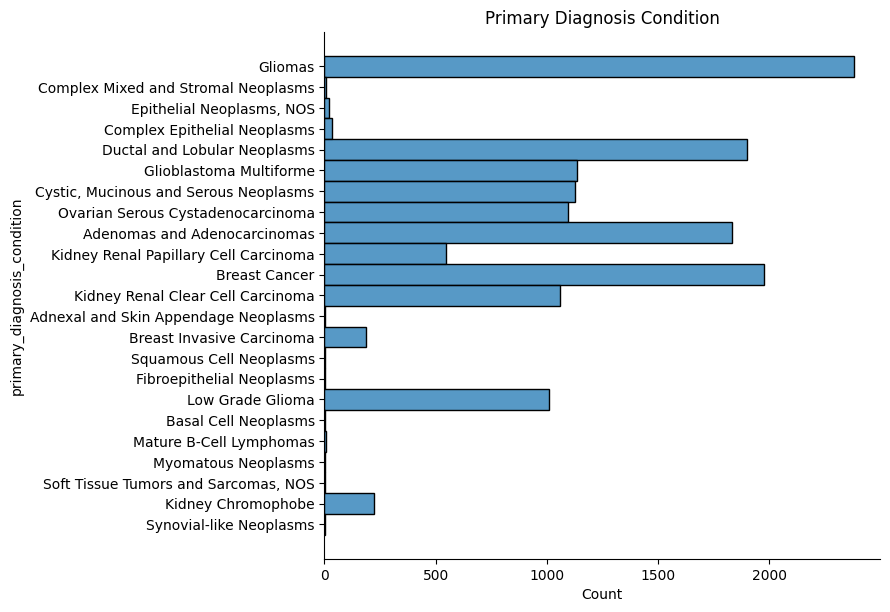

In [138]:
sns.displot(data=df2, y='primary_diagnosis_condition', height=6, aspect=1.5)
plt.title('Primary Diagnosis Condition')

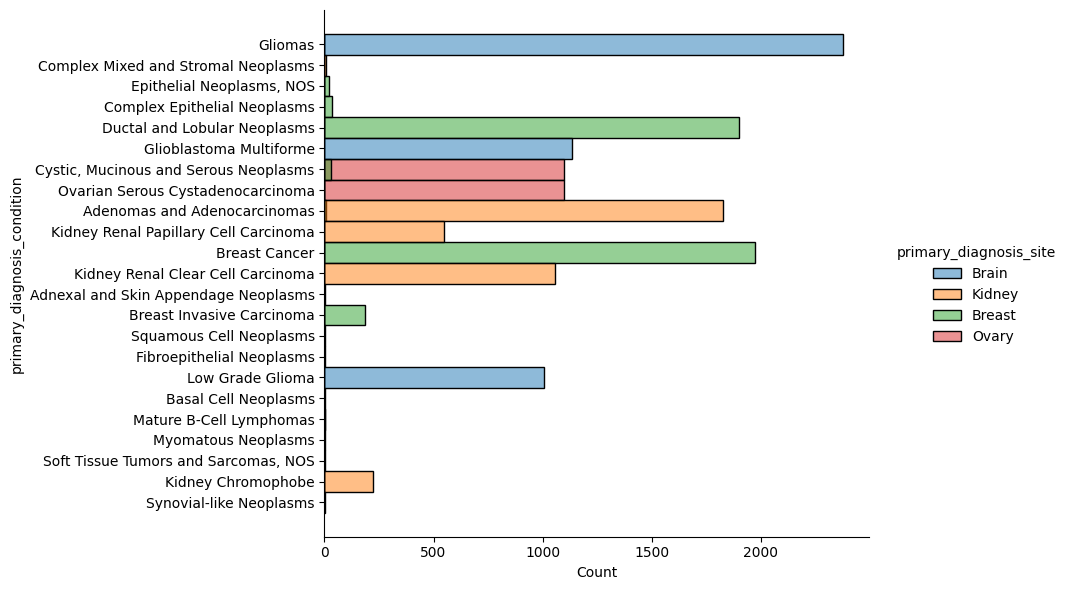

In [132]:
sns.displot(data=df2, y='primary_diagnosis_condition', hue='primary_diagnosis_site', height=6, aspect=1.5)
# plt.title('Primary Diagnosis Condition by Site')

Note: Breast and Kidney have a variety of different conditions

### Vital Status

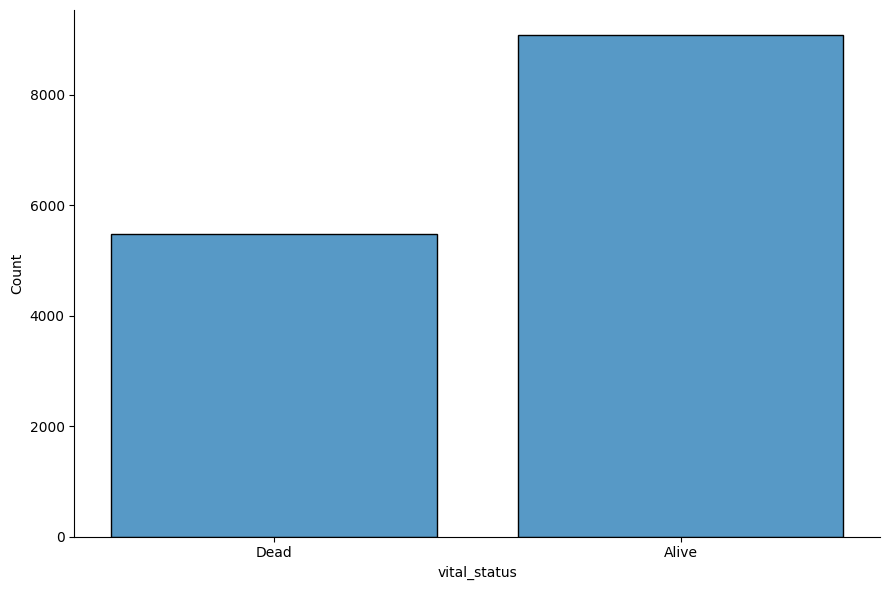

In [141]:
sns.displot(data=df2, x='vital_status', height=6, aspect=1.5, shrink=0.8)

Note: there are more survivors than non-surviviors

Text(0.5, 1.0, 'Vital Status per Primary Condition Site')

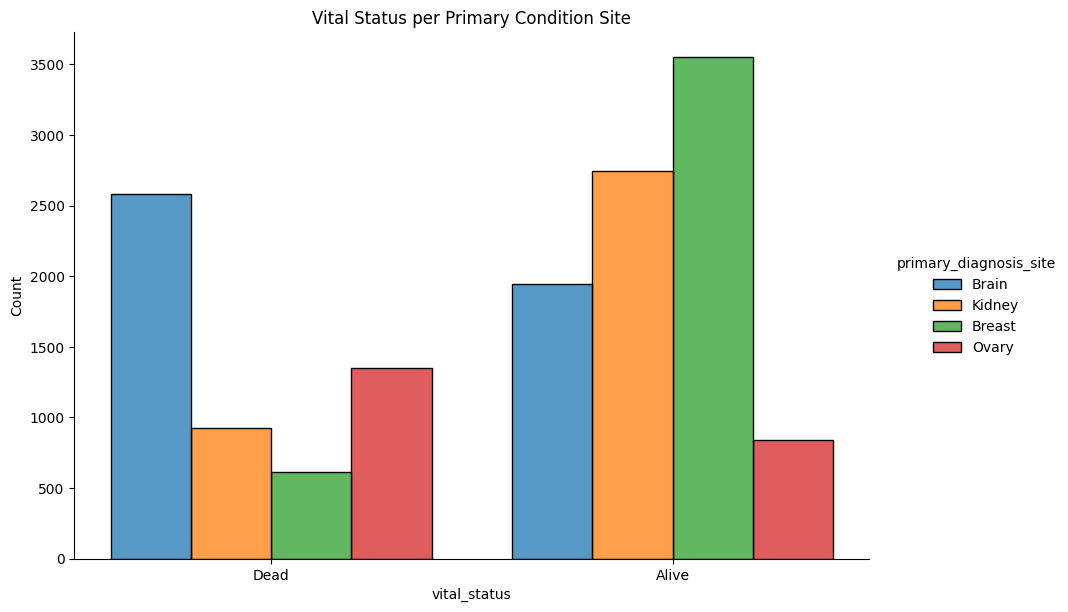

In [140]:
sns.displot(data=df2, x='vital_status', hue='primary_diagnosis_site', multiple='dodge', height=6, aspect=1.5, shrink=0.8)
plt.title('Vital Status per Primary Condition Site')

Note:
* The primary diagnosis site with the most deaths is Brain
* The primary diagnosis site with the most survivors is Breast

Text(0.5, 1.0, 'Average Age per Vital Status\n(for each Primary Diagnosis Site)')

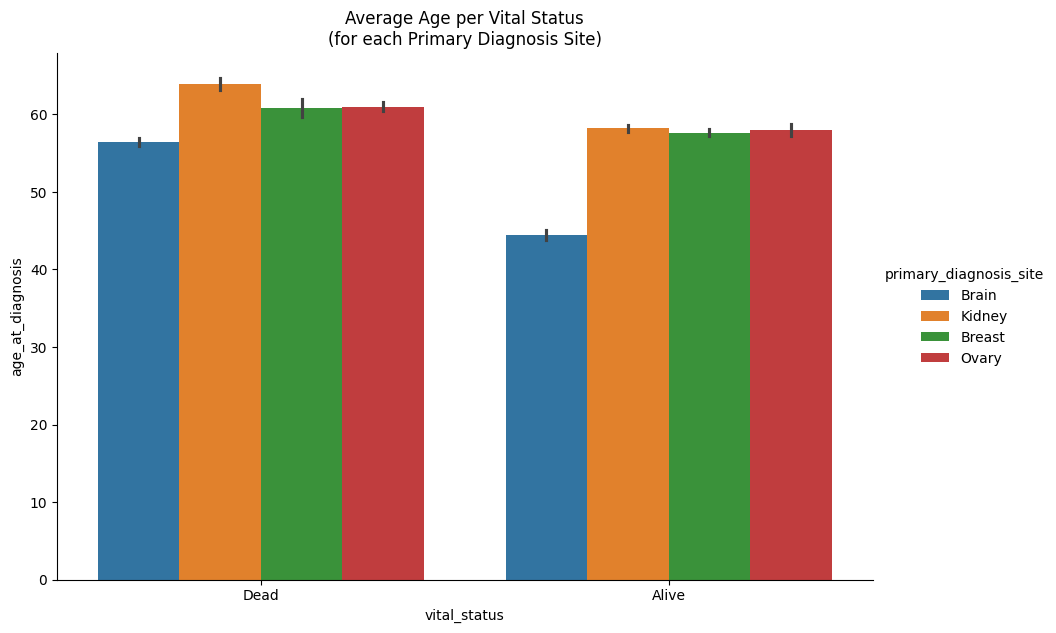

In [149]:
sns.catplot(data=df2, x='vital_status', y='age_at_diagnosis', hue='primary_diagnosis_site', kind='bar', height=6, aspect=1.5)
plt.title('Average Age per Vital Status\n(for each Primary Diagnosis Site)')